## Encontrar características entre usuarios con más de 100,000 seguidores a partir de los tweets que escriben

### Alejandro Mariacca Santin - A01654102

### Objetivo

Este análisis se centrará en la búsqueda e identificación de características similares entre los tweets de los usuarios con más de 100 mil seguidores durante la época de la pandemia por Covid-19. 

Visto con las métricas para metas smart, se puuede visualizar de la siguiente forma:
* **S**pecific: Encontrar  las palabras en común que twittean las personas con más de 100 mil seguidores y además, encontrar el promedio de seguidores que tienen las personas que twittean sobre el covid.
* **M**easurable: Se medirá de acuerdo con la frecuencia que aparezcan las palabras.
* **A**chievable: La meta es alcanzable porque se disponen de los conocimientos y herramientas para llevarla a cabo.
* **R**elevant: Es relevante, porque a partir de ello se puede dividir la información en grupos y obtener insights que de otra forma no eran visibles.
* **T**ime bound: Esta meta debe cumplirse para antes del 24 de marzo de 2023 a las 11 am con tiempo de la Ciudad de México.

### Primer paso: Importar librerías y archivo csv

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import re
import nltk.corpus
# Descomentar si no está instalado
# nltk.download(‘stopwords’)
from nltk.corpus import stopwords
# Mi python anda loco y no quiere instalar wordcloud :(
#from wordcloud import WordCloud

# Cargar datos
data = pd.read_csv("covid19_tweets.csv")
# Obtener una breve visualización de los datos
data.head(5)



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [2]:
# Describir información
data.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
user_followers,74436.0,105951.312913,822289.985493,0.0,166.0,960.0,5148.00,13892841.0
user_friends,74436.0,2154.721170,9365.587474,0.0,153.0,552.0,1780.25,497363.0
user_favourites,74436.0,15297.472030,46689.714291,0.0,220.0,1927.0,10148.00,2047197.0


### Segundo paso: Hacer dataframe de usuarios con más de 100,000 seguidores

In [3]:
# Limpiar la columna de texto para evitar caracteres extraños
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    s = re.sub(r'\(*https*://[^\)]*\)*', "", s)
    s = re.sub(r'\*', '', s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

data['text_clean'] = ''
for i, row in data.iterrows():
    data.at[i, 'text_clean'] = clean(row.text)

# Depurar con stopwords
stop_words = stopwords.words('english')
data['text_relevant'] = data['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [4]:
# Mostrar resultados
data[['text', 'text_clean', 'text_relevant']]



,text,text_clean,text_relevant
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...,If I smelled scent hand sanitizers today someo...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR @MLB - made sense play...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift #COVID19 give apprec...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin Novel #CoronaVirusUpd...
...,...,...,...
74431,So far this summer I have filled up my lawn mo...,So far this summer I have filled up my lawn mo...,So far summer I filled lawn mower gas often I’...
74432,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B..."
74433,Community workers in Tianshan District of Urum...,Community workers in Tianshan District of Urum...,"Community workers Tianshan District Urumqi, no..."
74434,If only we had a responsible media to warn us ...,If only we had a responsible media to warn us ...,If responsible media warn us deadly unintended...


In [5]:
# Obtener usuarios con el número deseado de followers
above_100k_followers = data[data['user_followers'] > 100000]

# Limpiar columnas que no son relevantes
above_100k_followers.drop(['user_name', 'user_created'], axis=1)



,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_clean,text_relevant
4,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin Novel #CoronaVirusUpd...
25,"Mumbai, India",Focused on matching blood donors with those in...,1215920,2047,19359,True,2020-07-25 12:26:26,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,"['Kolar', 'Blood', 'COVID19']",Blood Donors India,False,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,#Kolar Need #Blood Type : B-positive At : Jala...
60,NaN,Official Government of India updates on #COVID...,100214,70,1748,True,2020-07-25 12:25:25,#IndiaFightsCorona :\n\n📍 Do you agree that a ...,['IndiaFightsCorona'],Twitter Web App,False,#IndiaFightsCorona :\n\n📍 Do you agree that a ...,#IndiaFightsCorona : 📍 Do agree mask one power...
77,"Washington, DC",Breaking news and alerts from the Internationa...,1695520,444,182,True,2020-07-25 12:25:02,What economic measures are governments taking ...,['COVID19'],Hootsuite Inc.,False,What economic measures are governments taking ...,What economic measures governments taking resp...
78,NaN,Oxfam is a world-wide development organization...,843670,1172,23652,True,2020-07-25 12:25:00,“#Covid19 is everyone’s fight. I have covered ...,['Covid19'],Twitter Web App,False,“#Covid19 is everyone’s fight. I have covered ...,“#Covid19 everyone’s fight. I covered major di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74371,NaN,Mobile-first digital news platform. We are the...,555520,311,255,True,2020-08-04 03:15:30,Former Karnataka CM Siddaramaiah said on 4 Aug...,['COVID19'],TweetDeck,False,Former Karnataka CM Siddaramaiah said on 4 Aug...,Former Karnataka CM Siddaramaiah said 4 August...
74381,"Hampton Roads, Virginia",Visit us online: https://t.co/O7Be1q7QDa.\nLik...,103781,1529,12462,True,2020-08-04 03:15:05,#BuschGardens set to reopen with #COVID19 safe...,"['BuschGardens', 'COVID19']",Hootsuite Inc.,False,#BuschGardens set to reopen with #COVID19 safe...,#BuschGardens set reopen #COVID19 safety measu...
74383,Chennai,All the tweets for breaking news & views.\nFac...,446503,552,540,True,2020-08-04 03:15:00,#TNIEeditorial | Many of the politicians who t...,['TNIEeditorial'],Buffer,False,#TNIEeditorial | Many of the politicians who t...,#TNIEeditorial | Many politicians tested posit...
74415,NaN,The official Twitter handle of the Communist P...,336277,78,3570,True,2020-08-04 03:14:09,India's #COVID19 curve continues to rise unaba...,['COVID19'],Twitter Web App,False,India's #COVID19 curve continues to rise unaba...,India's #COVID19 curve continues rise unabated...


### Tercer paso: Analizar sus tweets y encontrar palabras 

#### En esta sección se analizarán las variables "text_relevant" y "hashtags". 

In [6]:
# Obtener los hashtags más comunes
hashtags = Counter(above_100k_followers['hashtags'])

# Pasarlos a un dataframe y organizarlos
hashtagsDF = pd.DataFrame.from_dict(hashtags, orient='index').reset_index()
hashtagsDF.columns = ['Hashtags', 'Count']
hashtagsDF.Count = hashtagsDF.Count.astype(int)
sortedHashtags = hashtagsDF.sort_values('Count', ascending=False).head(20)

# Imprimir
sortedHashtags



,Hashtags,Count
3,['COVID19'],1277
8,NaN,806
4,['Covid19'],178
71,['coronavirus'],35
26,"['coronavirus', 'COVID19']",32
0,"['CoronaVirusUpdates', 'COVID19']",29
33,['covid19'],27
75,"['IndiaFightsCorona', 'COVID19']",26
113,"['Hyderabad', 'Blood']",18
36,"['Odisha', 'COVID19']",15


In [7]:
# Obtener las palabras más comunes en los tweets
texts = Counter(" ".join(above_100k_followers["text_relevant"]).split()).most_common(100)


# Pasarlos a un dataframe y organizarlos
wordsDF = pd.DataFrame(texts)
wordsDF.columns = ['Words', 'Count']
wordsDF.Count = wordsDF.Count.astype(int)
sortedWords = wordsDF.sort_values('Count', ascending=False).head(20)

# Imprimir
sortedWords

,Words,Count
0,#COVID19,1909
1,cases,584
2,The,367
3,new,338
4,:,326
5,#Covid19,300
6,&,228
7,positive,224
8,Need,199
9,|,191


### Cuarto paso: Analizar resultados

#### A continuación se presentarán gráficas así como mi interpretación de las mismas.

Primero comienzo con la distribución de usuarios y su número de seguidores. Como se puede apreciar en la gráfica de abajo, el 75% de los usuarios con más de 100 mil seguidores no pasa de los 2 millones de seguidores. En promedio, tienen poco menos de 1 millón, aunque eso ya se sabía. Lo que es realmente nuevo es ver la cantidad de outliers. Se puede ver que a partir de los 4 millones y medio de seguidores aproximadamente, las cuentas simplemente son atípicas y ya no forman parte de la caja o los bigotes. 

Text(0.5, 1.0, 'Distribución de followers')

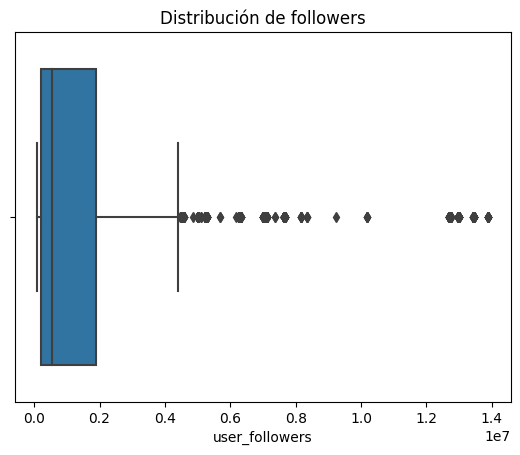

In [8]:
sns.boxplot(x=above_100k_followers['user_followers']).set_title("Distribución de followers")



En el siguiente histograma se puede observar el número de veces que fue usado cada hashtag. Al ser en un periodo de COVID, es entendible el uso de la palabra. Al observar la lista de hashtags, es notable la presencia del gobierno e instituciones indias. De este histograma se puede concluir que las personas con más de 100 mil seguidores twitteraon sobre temas relacionados con el covid. Se podría intuir que usaban su poder para crear consciencia o que buscaban aumentar sus seguidores al twittear sobre el tema dle momento. Es interesante también notar que se puede deducir el estado de la pandemia al revisar los hashtags "SecondPeak" y "SecondWave".

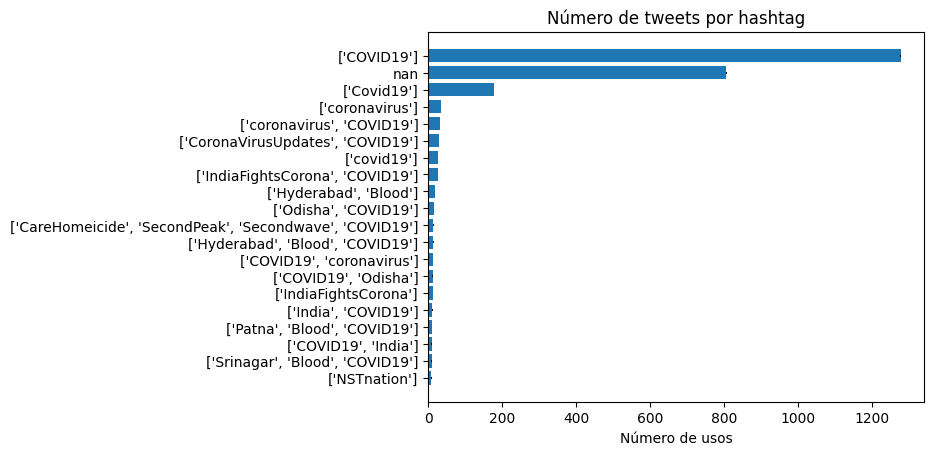

In [9]:
# Hacer plot de la gráfica

fig, ax = plt.subplots()

people = sortedHashtags['Hashtags']
y_pos = np.arange(len(people))
performance = sortedHashtags['Count'].to_numpy()
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de usos')
ax.set_title('Número de tweets por hashtag')

plt.show()



También se hizo un histograma sobre las 20 palabras más comunes en los tweets de los usuarios. Aquí también se puede ver la congruencia con la gráfica anterior y las suposiciones hechas. Aquí también hace una aparición India. Las palabras menos usadas tiene que ver con información como es el caso de "tested", "reported", "total". Y las más usadas se enfocan en el nombre del virus y los nuevos casos. A partir de esto, es posible sugerir que los usuarios seleccionados enfocaban su atención en el incremento de casos.

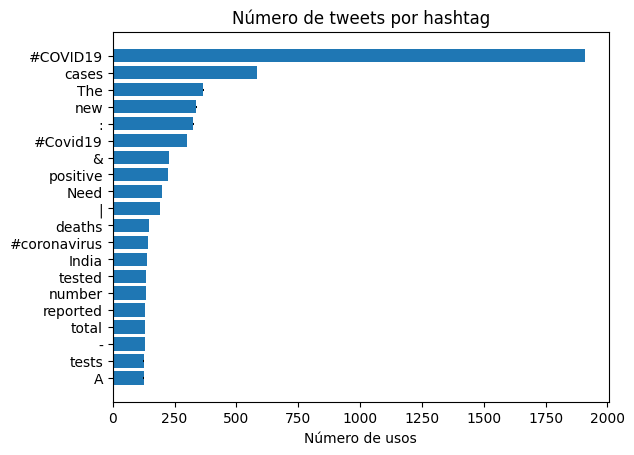

In [10]:
# Hacer plot de la gráfica

fig, ax = plt.subplots()

people = sortedWords['Words']
y_pos = np.arange(len(people))
performance = sortedWords['Count'].to_numpy()
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de usos')
ax.set_title('Número de tweets por hashtag')

plt.show()



#### Quinto paso: Conclusiones

A pesar de no ser un análisis extensivo, se puede notar que los usuarios con más de 100 mil seguidores comparten algunas características. Entre ellas, se puede identificar que a pesar de ser cuentas con muchos seguidores, no llegan a ser colosales. También se debe mencionar su uso similar de hashtags y palabras para comunicar sus ideas a través de tweets.  El análisis de caja y bigotes se usó para encontrar la distribución de usuarios. Un heatmap podría ayudar a confirmar algunas de la suposiciones al compara usuarios y mostrar las zonas de convergencia, sin embargo, no fue empleado por falta de tiempo. Incluso una nube de palabras o un análisis de sentimientos hubiera arrojado datos mucho más decisivos sobre el comportamiento de estos usuarios. Es totalmente posible incluir un análsis de K-means, pues este hubiera revelado datos que son visibles a simple vista. K-means hubiera aportado una nueva perspectiva para saber qué tanto se parecen los usuarios entre sí y qué tan poco se parecen. Al final, es posible decir que sí hay características entre los usuarios seleccionados.

